In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-feedback-survey-responses/student_feedback.csv


let we open the file

In [2]:
df = pd.read_csv("/kaggle/input/student-feedback-survey-responses/student_feedback.csv")

In [3]:
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


column headings has some space and lengthy let we remove the space and Unnamed column since it was representing the index number so let we drop that column

 * ****let we check the column headings

In [4]:
for column in df:
    df.columns = df.columns.str.replace(' ','_')
df.drop('Unnamed:_0', axis=1, inplace=True)
df.columns

Index(['Student_ID', 'Well_versed_with_the_subject',
       'Explains_concepts_in_an_understandable_way', 'Use_of_presentations',
       'Degree_of_difficulty_of_assignments', 'Solves_doubts_willingly',
       'Structuring_of_the_course',
       'Provides_support_for_students_going_above_and_beyond',
       'Course_recommendation_based_on_relevance'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Student_ID                                            1001 non-null   int64
 1   Well_versed_with_the_subject                          1001 non-null   int64
 2   Explains_concepts_in_an_understandable_way            1001 non-null   int64
 3   Use_of_presentations                                  1001 non-null   int64
 4   Degree_of_difficulty_of_assignments                   1001 non-null   int64
 5   Solves_doubts_willingly                               1001 non-null   int64
 6   Structuring_of_the_course                             1001 non-null   int64
 7   Provides_support_for_students_going_above_and_beyond  1001 non-null   int64
 8   Course_recommendation_based_on_relevance              1001 non-null   int64
dty

In [6]:
df.isnull().sum()

Student_ID                                              0
Well_versed_with_the_subject                            0
Explains_concepts_in_an_understandable_way              0
Use_of_presentations                                    0
Degree_of_difficulty_of_assignments                     0
Solves_doubts_willingly                                 0
Structuring_of_the_course                               0
Provides_support_for_students_going_above_and_beyond    0
Course_recommendation_based_on_relevance                0
dtype: int64

# Null Values are not present in the data

# let us find some correlation are present in the variable or not 

In [7]:
cor=df.corr()

<AxesSubplot:>

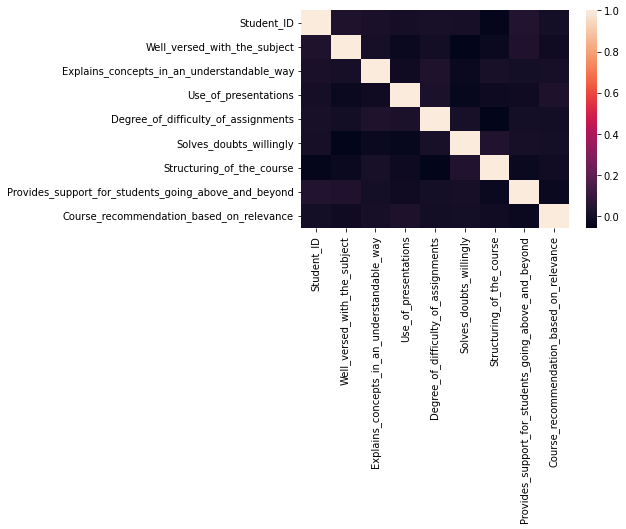

In [8]:
import seaborn as sns
sns.heatmap(cor)

* # **from above HeatMap there were no correlation between the variables in this data set**

**let us Calculate the Min & max value of each variables**

In [9]:
df_fb_min_max=df.agg([min,max])

# **Let us describe function******


In [10]:
df.describe()

,Student_ID,Well_versed_with_the_subject,Explains_concepts_in_an_understandable_way,Use_of_presentations,Degree_of_difficulty_of_assignments,Solves_doubts_willingly,Structuring_of_the_course,Provides_support_for_students_going_above_and_beyond,Course_recommendation_based_on_relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Let us use Clustering algorthim to find how many clusters are present in this data 

In [11]:
from sklearn.cluster import KMeans
df_fb_cl = KMeans(n_clusters=3).fit(df)
df_fb_cl.labels_
df_fb_cl_with_label = df.copy()
stu_fb_cl=df_fb_cl_with_label['Cluster_Label']=df_fb_cl.labels_
print(stu_fb_cl)

[1 2 0 ... 2 1 0]


# # Cluster Label were Created let us Create a data frame for ths

In [12]:
df_stu_fb_clust = pd.DataFrame(df_fb_cl_with_label)
print(df_stu_fb_clust)

      Student_ID  Well_versed_with_the_subject  \
0            340                             5   
1            253                             6   
2            680                             7   
3            806                             9   
4            632                             8   
...          ...                           ...   
996           55                             8   
997          913                             5   
998          199                             9   
999          539                            10   
1000         759                             7   

      Explains_concepts_in_an_understandable_way  Use_of_presentations  \
0                                              2                     7   
1                                              5                     8   
2                                              7                     6   
3                                              6                     7   
4                            

 # Let us create a each seprate variable for each clusters

In [13]:
stud_fb_cl_0=(df_stu_fb_clust[df_fb_cl_with_label['Cluster_Label'] == 0 ])
stud_fb_cl_1=(df_stu_fb_clust[df_fb_cl_with_label['Cluster_Label'] == 1 ])
stud_fb_cl_2=(df_stu_fb_clust[df_fb_cl_with_label['Cluster_Label'] == 2 ])


# Let us calcualate the mean value of each variables by grouping the variables by Clusters 
# for visualazation purpose we are doing this

In [14]:
std_fb_mean_val=df_stu_fb_clust.groupby("Cluster_Label").apply(np.mean)

# from above the mean value difference between the variables were noticed based on that we will plot the variables

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


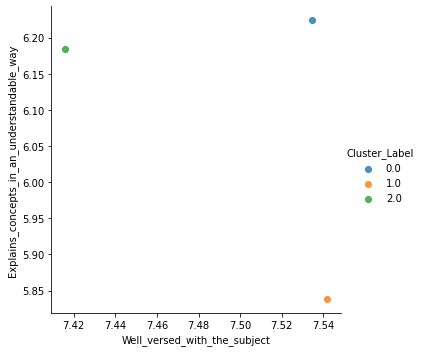

In [15]:
sns.lmplot("Well_versed_with_the_subject","Explains_concepts_in_an_understandable_way",hue='Cluster_Label',data=std_fb_mean_val
           ,fit_reg = False)

# from the above visual we can able to find cluster 1 & 2 students understanding way is higher than cluster 0 students 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


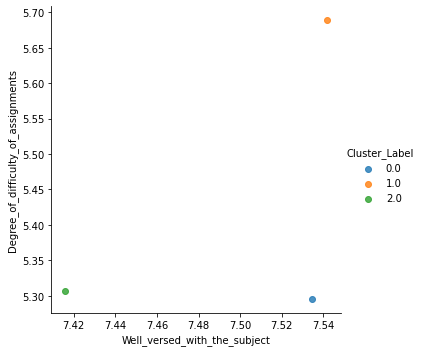

In [16]:
sns.lmplot("Well_versed_with_the_subject","Degree_of_difficulty_of_assignments",hue='Cluster_Label',data=std_fb_mean_val
           ,fit_reg = False)

# Cluster 0 group students feels very diffculty in assignments higher than  cluster 1 & 2 students

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


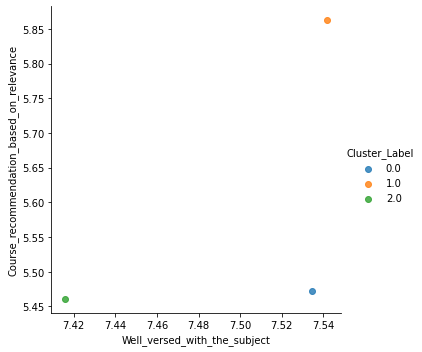

In [17]:
sns.lmplot("Well_versed_with_the_subject","Course_recommendation_based_on_relevance",hue='Cluster_Label',data=std_fb_mean_val
           ,fit_reg = False)

#  Cluster 0 students Course recommendation is higher than Cluster 1 & 2 

# Let us find the best K value using elbow Curve method

1    8.363683e+07
2    2.094917e+07
3    9.340729e+06
4    5.277478e+06
5    3.396608e+06
dtype: float64


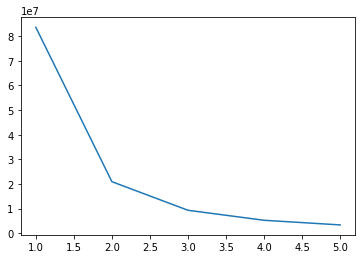

In [18]:
import matplotlib.pyplot as plt
df_fb_cl.inertia_
within_clust_dist=pd.Series([0.0]*5,index = range(1,6))
for k in range(1,6):
    df_fb_cl_anyk = KMeans(n_clusters = k).fit(df)
    within_clust_dist[k] = df_fb_cl_anyk.inertia_
print(within_clust_dist)
plt.plot(within_clust_dist)

from the above visuals K value 2 seems to be better but it has accuracy level of 2 is  2.094917e+07 so K value 3 will be best option since it has highest accuracy level 
9.340729e+06
